In [1]:
import os
import sys
# Adding the notebook directory to the sys path
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
root = os.path.dirname(notebook_dir)
sys.path.append(os.path.join(root))
import numpy as np
from src.decision import Decision
from src.outcome import Outcome
from src.event import Event
from src.decision_evaluation import evaluate_decision
from src.visualization import plot_distribution, plot_distribution_event, plot_utility_distribution, plot_decision_utility_distribution, plot_samples_and_utilities
from src.utils import verify_probability_distribution

In [2]:
# Define probabilistic events
event1 = Event("Good Weather", "normal", {'mean': 0.7, 'std': 0.1}, lambda x :1/(-10*x))
event2 = Event("Affordable Prices", "uniform", {'start': 0.5, 'end': 0.8}, lambda x : x*2)
event3 = Event("Interesting Activities", "binomial", {'n': 10, 'p': 0.6}, lambda x : x)

In [3]:
print(event1.samples[:10])
print(np.sum(event1.samples))
print(len(event1.samples))

[0.81556929 0.68885343 0.84718684 0.56759089 0.85598149 0.83646597
 0.67076253 0.60610743 0.54240532 0.85839448]
6985.216647951148
10000


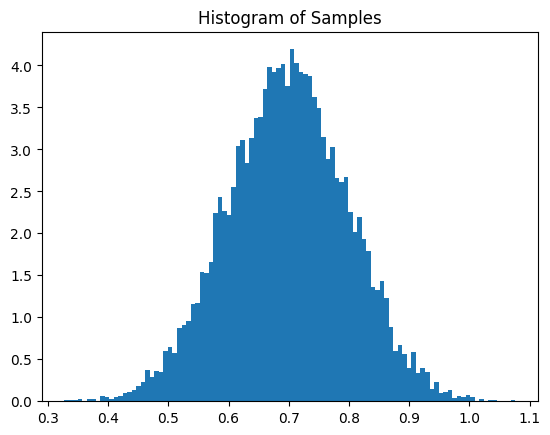

Total probability is approximately: 1.0


In [4]:
# Example usage with samples from an event
total_prob = verify_probability_distribution(event1.samples)
print(f"Total probability is approximately: {total_prob}")

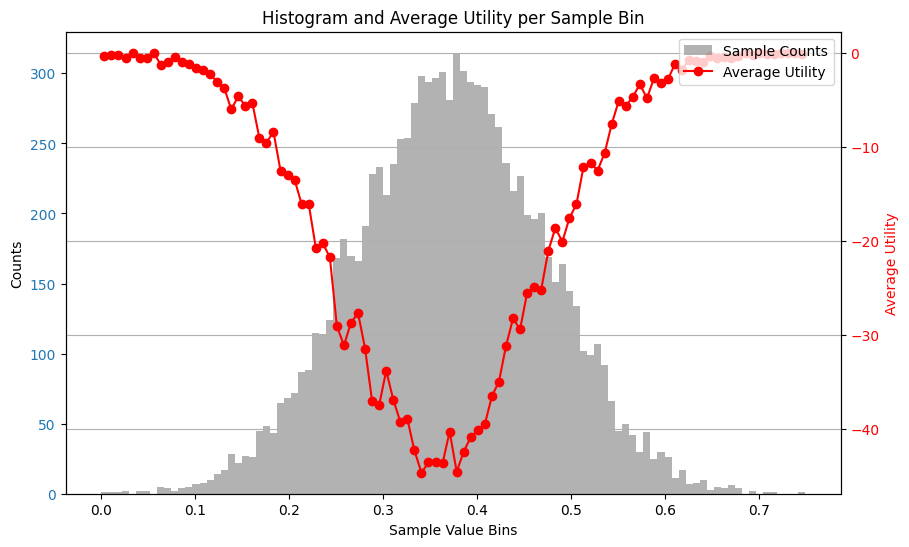

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def plot_us(event):
    bins = 100
    samples = event.samples
    utilities = event.utilities
    
    # Calculate max and min
    max_val, min_val = np.max(samples), np.min(samples)
    bin_size = (max_val - min_val) / bins
    
    # Initialize counts and utility sums for each bin
    counts = np.zeros(bins)
    bins_utility = np.zeros(bins)
    
    # Assign samples and utilities to bins
    for s, u in zip(samples, utilities):
        # Calculate the bin index
        bin_index = int((s - min_val) / bin_size)
        if bin_index == bins:  # handle the edge case where sample is exactly max_val
            bin_index -= 1
        counts[bin_index] += 1
        bins_utility[bin_index] += u
    
    # Define the bin edges for plotting
    bin_edges = [i * bin_size for i in range(bins + 1)]
    bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(bins)]
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot histogram of samples on primary y-axis
    ax1.bar(bin_centers, counts, width=bin_size, alpha=0.6, color='gray', label='Sample Counts')
    ax1.set_xlabel('Sample Value Bins')
    ax1.set_ylabel('Counts')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
  

    # Create a secondary y-axis for average utility
    ax2 = ax1.twinx()
    ax2.plot(bin_centers, bins_utility, 'r-o', label='Average Utility')
    ax2.set_ylabel('Average Utility', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Title and legend
    plt.title('Histogram and Average Utility per Sample Bin')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    
    plt.grid(True)
    plt.show()
plot_us(event1)


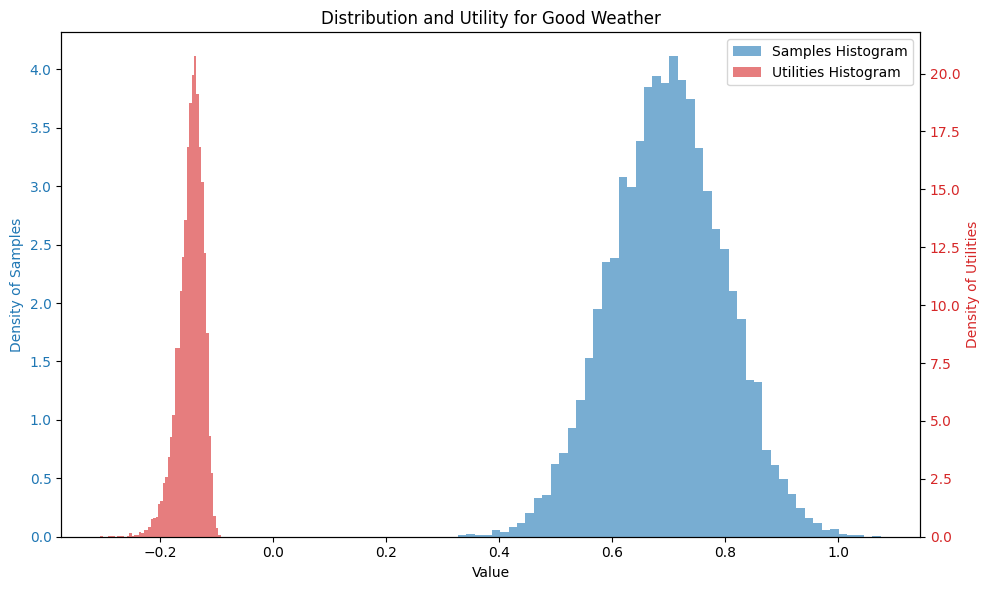

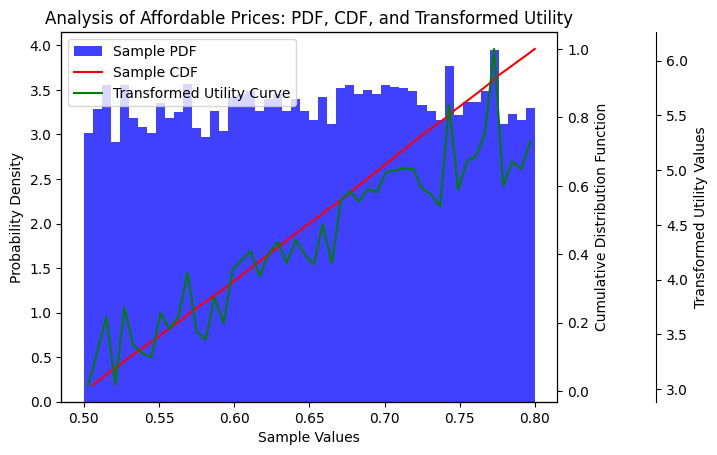

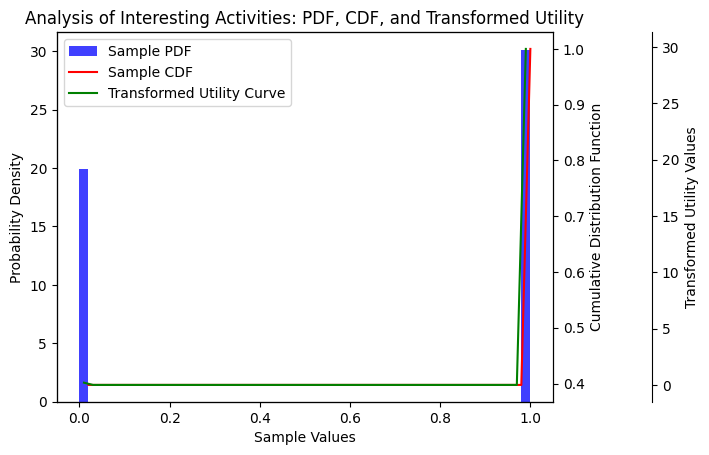

In [6]:
# Plot probability distributions for each event
plot_samples_and_utilities(event1)
plot_distribution_event(event2)
plot_distribution_event(event3)

In [7]:
# Create complementary events
not_event1 = event1.complementary_event()
not_event2 = event2.complementary_event()
not_event3 = event3.complementary_event()